<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


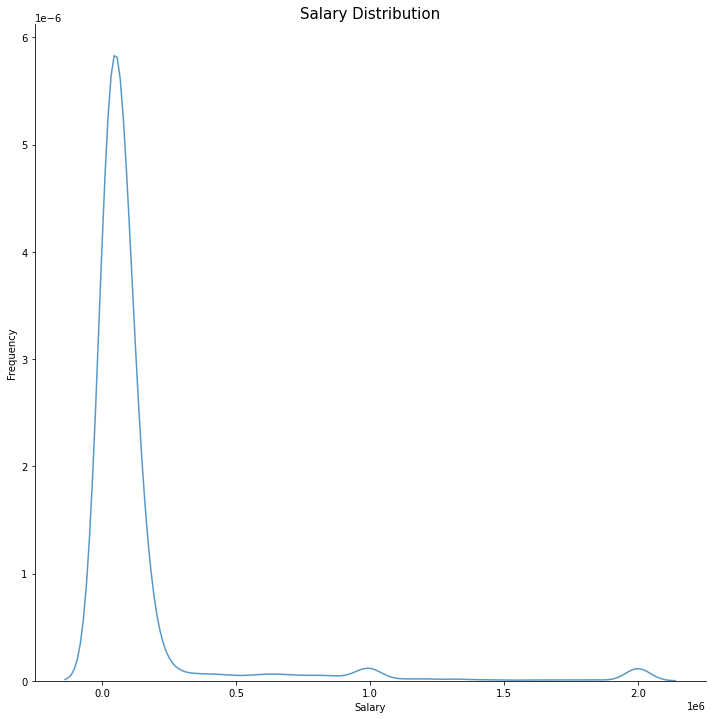

In [3]:
p = sns.displot(df['ConvertedComp'], kind='kde', palette='Blues', alpha=0.75, height=10)
plt.title('Salary Distribution', fontsize=15)
plt.xlabel('Salary')
plt.ylabel('Frequency');

In [4]:
df['ConvertedComp'].value_counts().sort_values().tail()

120000.0      86
150000.0      92
100000.0      99
1000000.0    105
2000000.0    138
Name: ConvertedComp, dtype: int64

Plot the histogram for the column ConvertedComp.

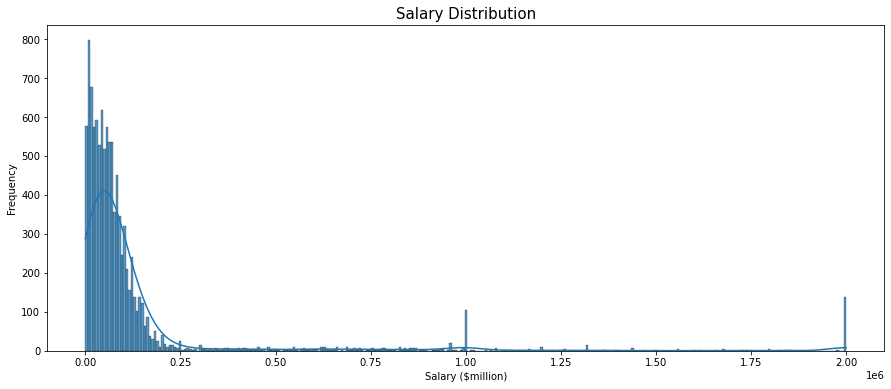

In [5]:
plt.figure(figsize=(15,6))
sns.histplot(df['ConvertedComp'], kde=True, palette='Blues', alpha=0.75);
plt.title('Salary Distribution', fontsize=15)
plt.xlabel('Salary ($million)')
plt.ylabel('Frequency');

What is the median of the column `ConvertedComp`?


In [6]:
print('The median Salary is {}$'.format(df['ConvertedComp'].median()))

The median Salary is 57745.0$


How many responders identified themselves only as a **Man**?


In [7]:
man_count = df.Gender.value_counts().Man
print('The Number of responders identified themselves only as a Man = {}'.format(man_count))

The Number of responders identified themselves only as a Man = 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
woman = df.query('Gender == "Woman"')
woman.ConvertedComp.median()
print('The median Salary of responders identified themselves only as a Woman is {}$'.format(woman.ConvertedComp.median()))

The median Salary of responders identified themselves only as a Woman is 57708.0$


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
df.Age.describe()['min':'max']

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


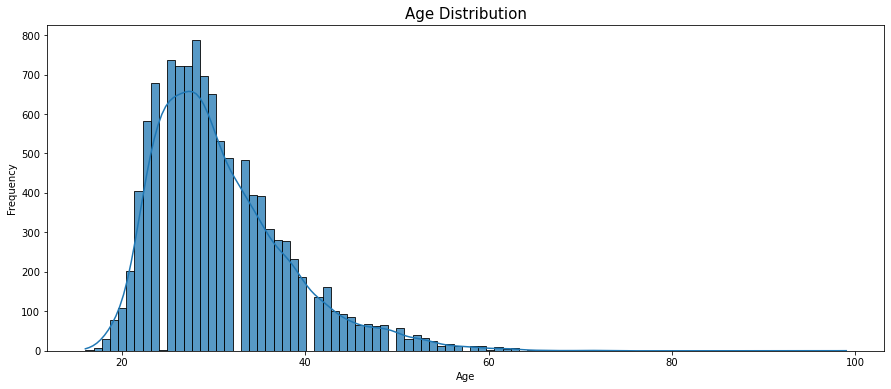

In [10]:
# your code goes here
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], kde=True, palette='Blues', alpha=0.75);
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency');

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


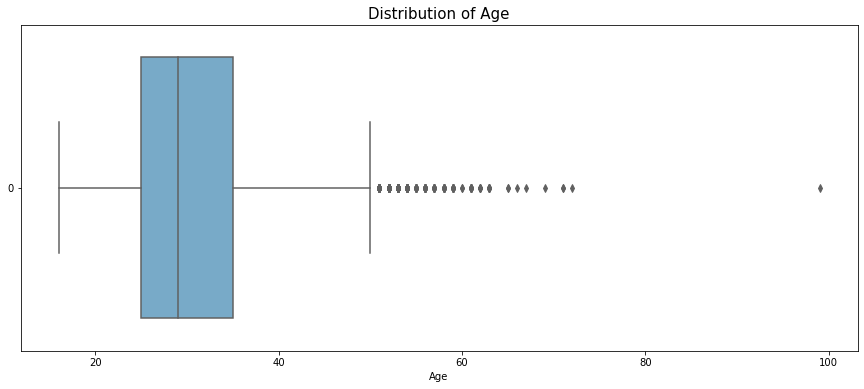

In [11]:
# your code goes here
plt.figure(figsize=(15,6))
sns.boxplot(data = df['Age'], palette='Blues', orient='h');
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Age');

**Outliers does exist in the Age Feature**

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
Q3 = df.ConvertedComp.quantile(.75)
Q1 = df.ConvertedComp.quantile(.25)

IQR = Q3-Q1
IQR

73132.0

Find out the upper and lower bounds.


In [13]:
# your code goes here
upper = Q3+(IQR*1.5)
lower = Q1-(IQR*1.5)
print('Upper: ',upper," ",'Lower: ',lower)

Upper:  209698.0   Lower:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
n_outliers = df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)].shape[0]
print('The number of `ouliers` in the ConvertedComp Column = {}'.format(n_outliers))

The number of `ouliers` in the ConvertedComp Column = 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
mask = (df['ConvertedComp'] >=lower) & (df['ConvertedComp'] <=upper)
df = df[mask]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


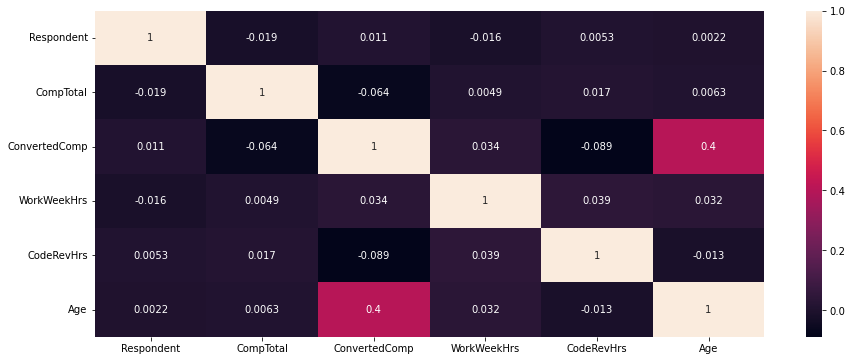

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True);

**Age** Feature has a moderate correlation with **ConvertedComp (i.e Salary)** Feature

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
